In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#reading data downloaded from Kaggle dataset
wine_df = pd.read_csv('winequality-red.csv')

In [3]:
#examining the dataframe for features and label
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#checking for missing values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
#statistics
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


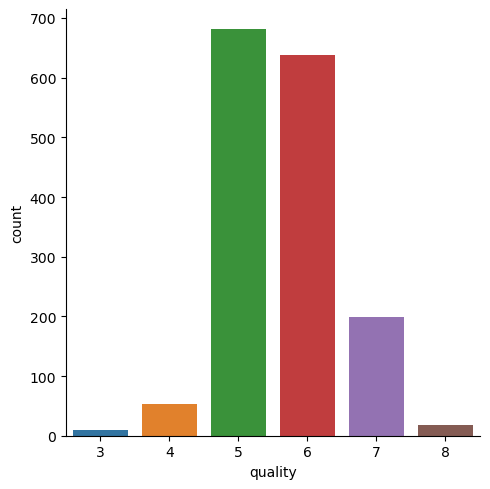

In [6]:
#examining the data through a plot
sns.catplot(x='quality', data=wine_df, kind='count')

In [7]:
#splitting our data into X and y
#Doing a binary classification such that if quality is >= 7, then we have high quality i.e. 1, else 0
X = wine_df.drop('quality',axis=1)
y = wine_df['quality'].apply(lambda yval:1 if yval>=7 else 0)


In [8]:
#quick check of the spread of quality output in our dataset
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [9]:
# train, test, split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print(y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [19]:
#train the Random Forest Classifier model
model = RandomForestClassifier()
model.fit(X_train, Y_train)
# validation metrics
from sklearn.metrics import classification_report
X_test_prediction = model.predict(X_test)
print(classification_report(X_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       294
           1       0.54      0.77      0.63        26

    accuracy                           0.93       320
   macro avg       0.76      0.86      0.80       320
weighted avg       0.94      0.93      0.93       320



In [15]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, Y_train)
print(grid_search.best_estimator_)


RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=50)


In [24]:
#using the preferable parameters as shown above
model_grid = RandomForestClassifier(max_depth=6,
                                    max_features=None,
                                    max_leaf_nodes=9,
                                    n_estimators=50)
model_grid.fit(X_train, Y_train)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, Y_test))


              precision    recall  f1-score   support

           0       0.98      0.94      0.96       294
           1       0.54      0.77      0.63        26

    accuracy                           0.93       320
   macro avg       0.76      0.86      0.80       320
weighted avg       0.94      0.93      0.93       320



In [25]:
#Trying new unseen dummy data in our prediction system
input_data = (6.8,0.220,0.34,3.4,0.031,14.0,16.0,0.92484,3.39,0.92,10.6)
np_input_data = np.asarray(input_data)
reshaped_data = np_input_data.reshape(1,-1)
predict = model.predict(reshaped_data)

if predict[0] == 1:
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

Bad Quality Wine


/Users/ahmadelmasri/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
